In [4]:
import pandas as pd

# Read the training and test data from CSV files
train_data = pd.read_csv('/content/Consumer_Complaints_train.csv')
test_data = pd.read_csv('/content/Consumer_Complaints_test.csv')
print(train_data.head())

# Display the data types for the training data
print("\nTraining Data Types:")
print(train_data.dtypes)

print("\n",test_data.head())
# Display the data types for the test data
print("\nTest Data Types:")
print(test_data.dtypes)


  Date received                  Product  \
0    14-10-2015         Credit reporting   
1    26-04-2015  Bank account or service   
2    20-12-2013              Credit card   
3    03-03-2016          Debt collection   
4    30-01-2015          Debt collection   

                             Sub-product  \
0                                    NaN   
1             Other bank product/service   
2                                    NaN   
3  Other (i.e. phone, health club, etc.)   
4                                Medical   

                                    Issue  \
0  Incorrect information on credit report   
1                Deposits and withdrawals   
2                                   Other   
3         Disclosure verification of debt   
4         Disclosure verification of debt   

                              Sub-issue  \
0               Information is not mine   
1                                   NaN   
2                                   NaN   
3  Not given enough info to

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the training data from CSV file
train_data = pd.read_csv('/content/Consumer_Complaints_train.csv')

# Task: Check columns with missing values
missing_values = train_data.isnull().mean()
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

# Task: Extract day, month, and year from the 'Date Received' column
train_data['Date Received'] = pd.to_datetime(train_data['Date received'], errors='coerce')
train_data['Month Received'] = train_data['Date Received'].dt.month
train_data['Year Received'] = train_data['Date Received'].dt.year
train_data['Day Received'] = train_data['Date Received'].dt.day

# Display the modified DataFrame
print("\nModified DataFrame:")
print(train_data.head())


Columns with Missing Values:
Sub-product                     0.289251
Sub-issue                       0.611393
Consumer complaint narrative    0.843427
Company public response         0.810677
State                           0.008091
ZIP code                        0.008113
Tags                            0.860021
Consumer consent provided?      0.716898
dtype: float64


<ipython-input-34-9796a984b44c>:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['Date Received'] = pd.to_datetime(train_data['Date received'], errors='coerce')



Modified DataFrame:
  Date received                  Product  \
0    14-10-2015         Credit reporting   
1    26-04-2015  Bank account or service   
2    20-12-2013              Credit card   
3    03-03-2016          Debt collection   
4    30-01-2015          Debt collection   

                             Sub-product  \
0                                    NaN   
1             Other bank product/service   
2                                    NaN   
3  Other (i.e. phone, health club, etc.)   
4                                Medical   

                                    Issue  \
0  Incorrect information on credit report   
1                Deposits and withdrawals   
2                                   Other   
3         Disclosure verification of debt   
4         Disclosure verification of debt   

                              Sub-issue  \
0               Information is not mine   
1                                   NaN   
2                                   NaN   
3  Not

In [47]:
import pandas as pd

# Read the training data from CSV file
train_data = pd.read_csv('/content/Consumer_Complaints_train.csv')

# Calculate the Number of Days the Complaint was with the Company
train_data['Date received'] = pd.to_datetime(train_data['Date received'])
train_data['Date sent to company'] = pd.to_datetime(train_data['Date sent to company'])
train_data['Days held'] = (train_data['Date sent to company'] - train_data['Date received']).dt.days

# Drop specified fields
fields_to_drop = ['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID']
train_data = train_data.drop(columns=fields_to_drop)

# Display the modified DataFrame
print(train_data.head())


<ipython-input-47-927dba66200f>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['Date received'] = pd.to_datetime(train_data['Date received'])
<ipython-input-47-927dba66200f>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['Date sent to company'] = pd.to_datetime(train_data['Date sent to company'])


                   Product                            Sub-product  \
0         Credit reporting                                    NaN   
1  Bank account or service             Other bank product/service   
2              Credit card                                    NaN   
3          Debt collection  Other (i.e. phone, health club, etc.)   
4          Debt collection                                Medical   

                                    Issue  \
0  Incorrect information on credit report   
1                Deposits and withdrawals   
2                                   Other   
3         Disclosure verification of debt   
4         Disclosure verification of debt   

                              Sub-issue  \
0               Information is not mine   
1                                   NaN   
2                                   NaN   
3  Not given enough info to verify debt   
4  Not given enough info to verify debt   

                        Consumer complaint narrative  \

In [37]:
import pandas as pd

# Read the training data from CSV file
train_data = pd.read_csv('/content/Consumer_Complaints_train.csv')

# Impute Null value in “State” by Mode
state_mode = train_data['State'].mode()[0]
train_data['State'].fillna(state_mode, inplace=True)

# Create a new field 'Week_Received' where we calculate the week based on the day of receiving
train_data['Date received'] = pd.to_datetime(train_data['Date received'])
train_data['Week_Received'] = train_data['Date received'].dt.week

# Display the modified DataFrame
print(train_data.head())


<ipython-input-37-abc2af17e053>:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['Date received'] = pd.to_datetime(train_data['Date received'])


  Date received                  Product  \
0    2015-10-14         Credit reporting   
1    2015-04-26  Bank account or service   
2    2013-12-20              Credit card   
3    2016-03-03          Debt collection   
4    2015-01-30          Debt collection   

                             Sub-product  \
0                                    NaN   
1             Other bank product/service   
2                                    NaN   
3  Other (i.e. phone, health club, etc.)   
4                                Medical   

                                    Issue  \
0  Incorrect information on credit report   
1                Deposits and withdrawals   
2                                   Other   
3         Disclosure verification of debt   
4         Disclosure verification of debt   

                              Sub-issue  \
0               Information is not mine   
1                                   NaN   
2                                   NaN   
3  Not given enough info to

<ipython-input-37-abc2af17e053>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_data['Week_Received'] = train_data['Date received'].dt.week


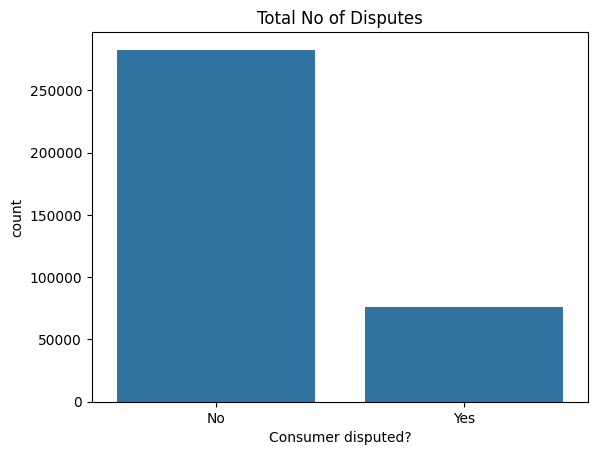

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the training data from CSV file
train_data = pd.read_csv('/content/Consumer_Complaints_train.csv')

# Store data of disputed people into the “disputed_cons” variable
disputed_cons = train_data[train_data['Consumer disputed?'] == 'Yes']

# Plot bar graph of the total no of disputes of consumers with the help of seaborn
sns.countplot(x='Consumer disputed?', data=train_data)
plt.title('Total No of Disputes')
plt.show()


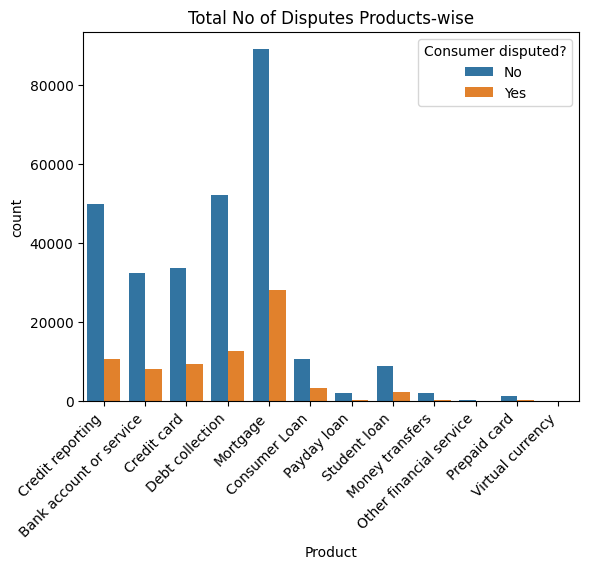

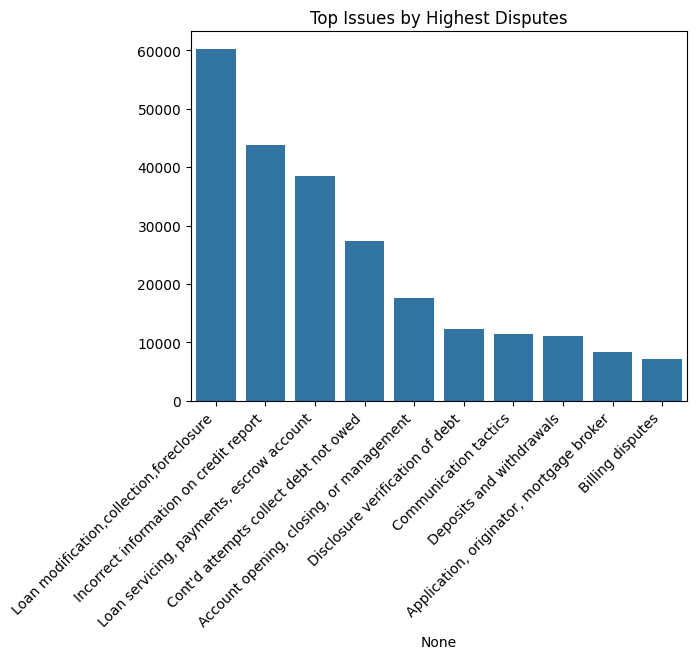

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the training data from CSV file
train_data = pd.read_csv('/content/Consumer_Complaints_train.csv')

# Task: Plot bar graph of the total no of disputes products-wise with the help of seaborn
sns.countplot(x='Product', hue='Consumer disputed?', data=train_data)
plt.title('Total No of Disputes Products-wise')
plt.xticks(rotation=45, ha='right')
plt.show()

# Task: Plot bar graph of the total no of disputes with Top Issues by Highest Disputes
top_issues = train_data['Issue'].value_counts().nlargest(10)
sns.barplot(x=top_issues.index, y=top_issues.values)
plt.title('Top Issues by Highest Disputes')
plt.xticks(rotation=45, ha='right')
plt.show()


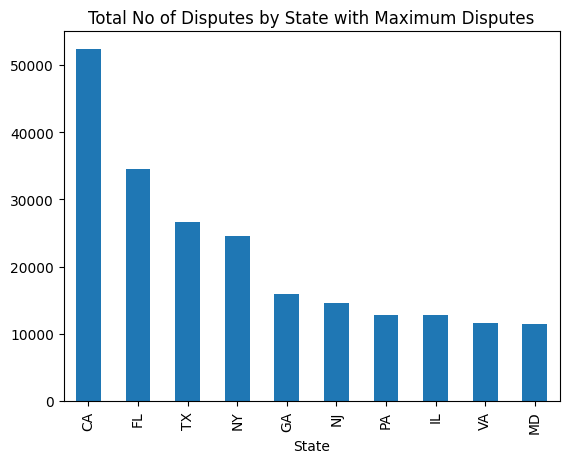

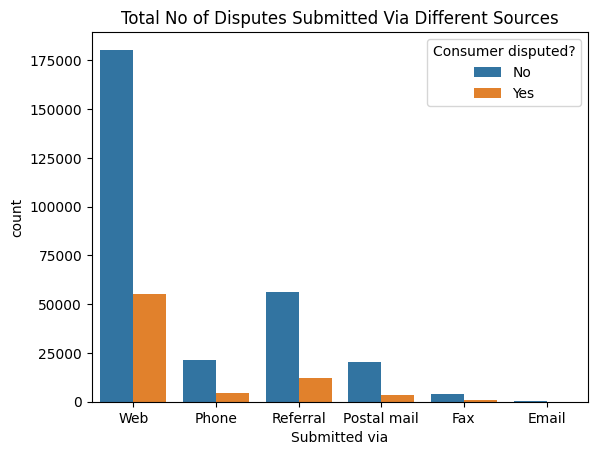

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the training data from CSV file
train_data = pd.read_csv('/content/Consumer_Complaints_train.csv')

# Task: Plot bar graph of the total no of disputes by State with Maximum Disputes
state_disputes = train_data.groupby('State')['Consumer disputed?'].value_counts().unstack().fillna(0)
state_disputes['Total Disputes'] = state_disputes['Yes'] + state_disputes['No']
state_disputes = state_disputes.sort_values(by='Total Disputes', ascending=False).head(10)
state_disputes.plot(kind='bar', y='Total Disputes', legend=False)
plt.title('Total No of Disputes by State with Maximum Disputes')
plt.show()

# Task: Plot bar graph of the total no of disputes Submitted Via different source
sns.countplot(x='Submitted via', hue='Consumer disputed?', data=train_data)
plt.title('Total No of Disputes Submitted Via Different Sources')
plt.show()


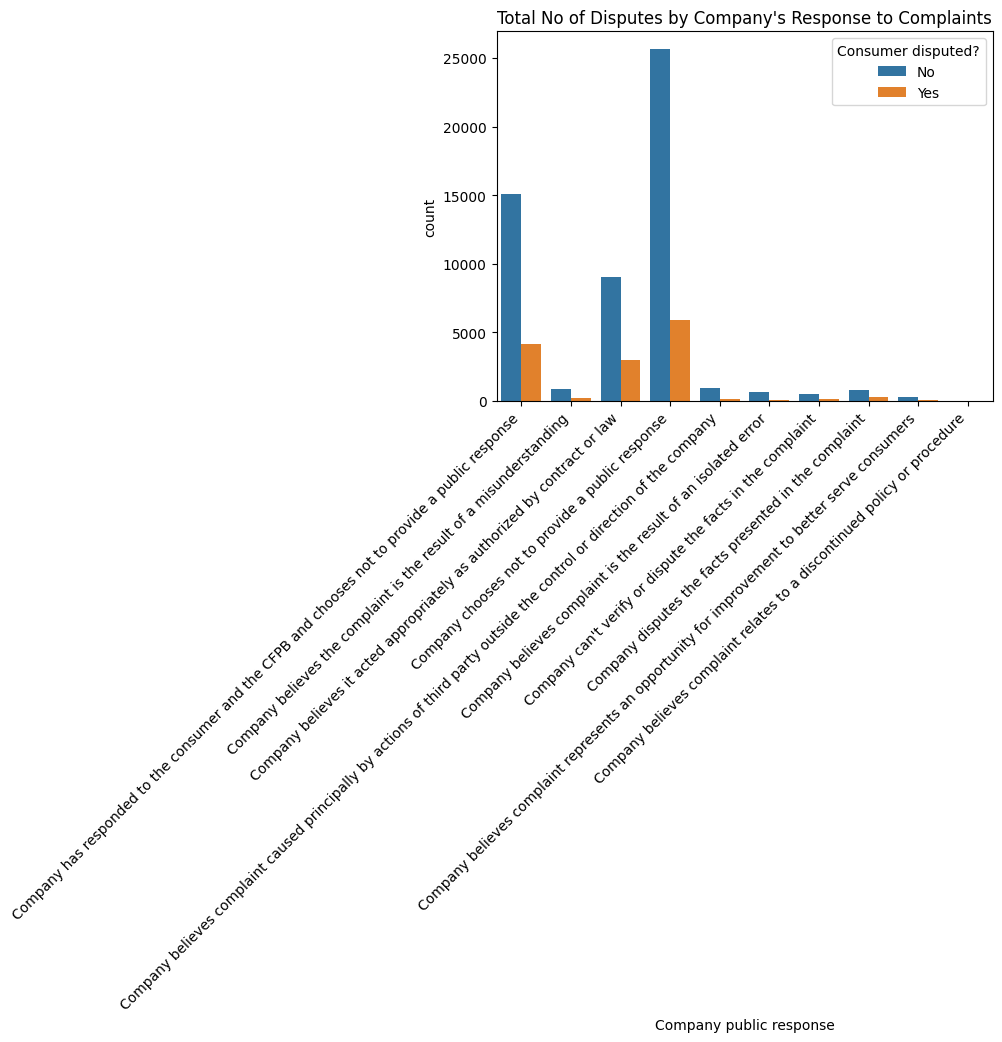

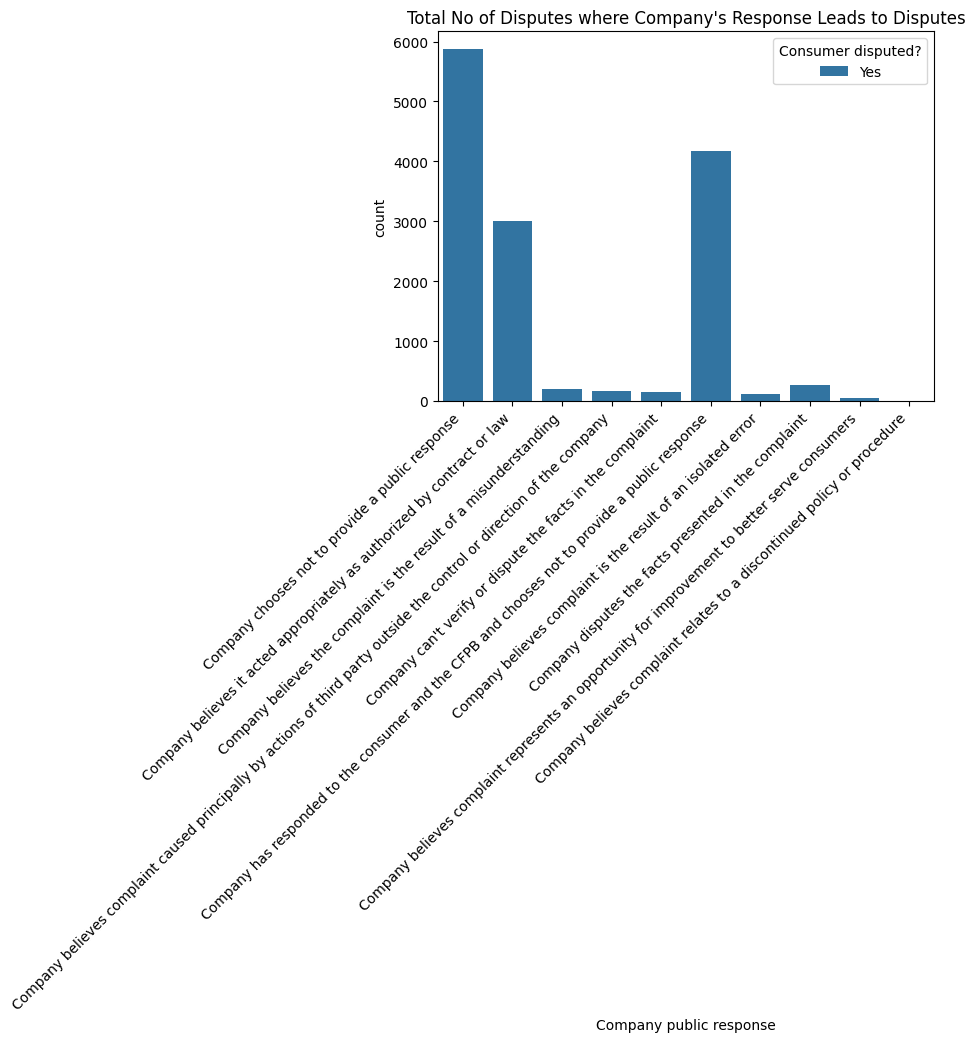

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the training data from CSV file
train_data = pd.read_csv('/content/Consumer_Complaints_train.csv')

# Task: Plot bar graph of the total no of disputes where the Company's Response to the Complaints
sns.countplot(x='Company public response', hue='Consumer disputed?', data=train_data)
plt.title("Total No of Disputes by Company's Response to Complaints")
plt.xticks(rotation=45, ha='right')
plt.show()

# Task: Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes
disputed_cons = train_data[train_data['Consumer disputed?'] == 'Yes']
sns.countplot(x='Company public response', hue='Consumer disputed?', data=disputed_cons)
plt.title("Total No of Disputes where Company's Response Leads to Disputes")
plt.xticks(rotation=45, ha='right')
plt.show()


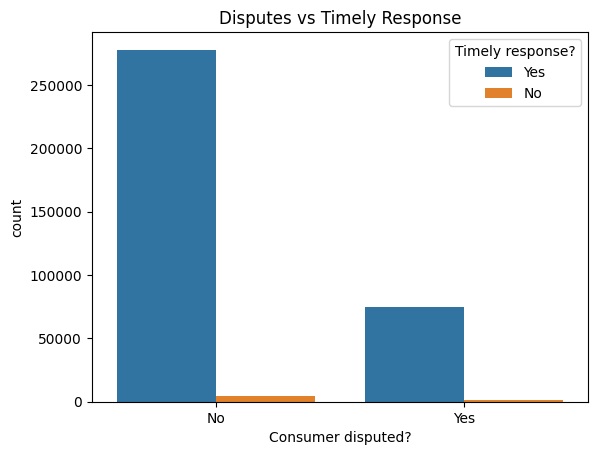

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the training data from CSV file
train_data = pd.read_csv('/content/Consumer_Complaints_train.csv')

# Task: Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response
sns.countplot(x='Consumer disputed?', hue='Timely response?', data=train_data)
plt.title('Disputes vs Timely Response')
plt.show()


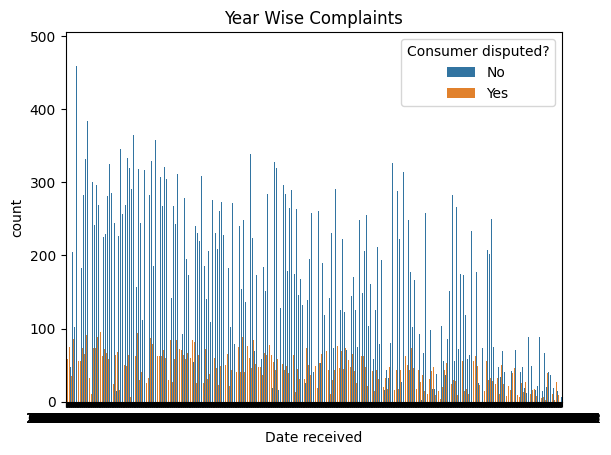

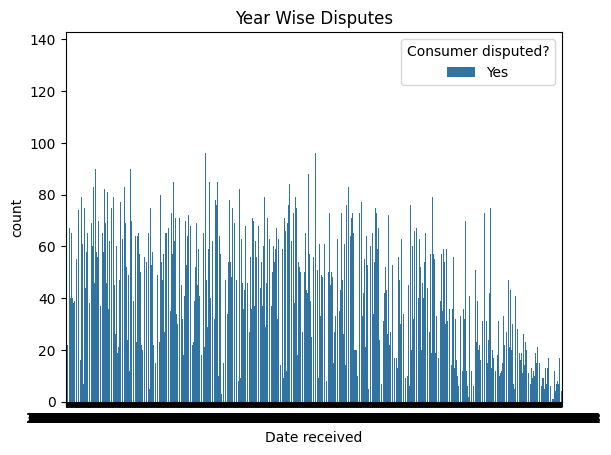

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the training data from CSV file
train_data = pd.read_csv('/content/Consumer_Complaints_train.csv')

# Task: Plot bar graph of the total no of disputes over Year Wise Complaints
sns.countplot(x='Date received', hue='Consumer disputed?', data=train_data)
plt.title('Year Wise Complaints')
plt.show()

# Task: Plot bar graph of the total no of disputes over Year Wise Disputes
disputed_cons = train_data[train_data['Consumer disputed?'] == 'Yes']
sns.countplot(x='Date received', hue='Consumer disputed?', data=disputed_cons)
plt.title('Year Wise Disputes')
plt.show()


<ipython-input-44-75bc00af994d>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['Date received'] = pd.to_datetime(train_data['Date received'])
<ipython-input-44-75bc00af994d>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['Date sent to company'] = pd.to_datetime(train_data['Date sent to company'])


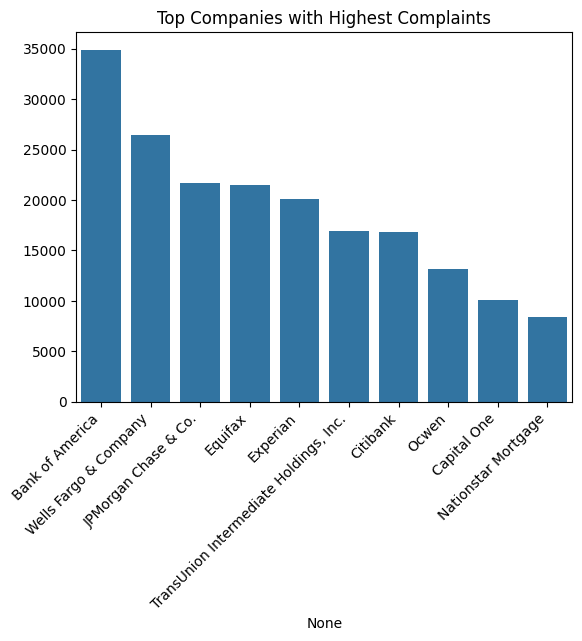

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the training data from CSV file
train_data = pd.read_csv('/content/Consumer_Complaints_train.csv')

# Calculate the Number of Days the Complaint was with the Company
train_data['Date received'] = pd.to_datetime(train_data['Date received'])
train_data['Date sent to company'] = pd.to_datetime(train_data['Date sent to company'])
train_data['Days held'] = (train_data['Date sent to company'] - train_data['Date received']).dt.days

# Task: Plot bar graph of Top Companies with Highest Complaints
top_companies = train_data['Company'].value_counts().nlargest(10)
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.title('Top Companies with Highest Complaints')
plt.xticks(rotation=45, ha='right')
plt.show()

# Convert all negative 'Days held' values to zero
train_data['Days held'] = train_data['Days held'].apply(lambda x: max(x, 0))


In [49]:
# Drop unnecessary columns for model building
drop_cols_model = ['Company', 'State', 'Days held']
train_data.drop(columns=drop_cols_model, inplace=True)


In [50]:
# Map 'Yes' to 1 and 'No' to 0 in the 'Consumer disputed?' column
train_data['Consumer disputed?'] = train_data['Consumer disputed?'].map({'Yes': 1, 'No': 0})


In [51]:
cat_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']

# Create dummy variables for categorical features
dummy_vars = pd.get_dummies(train_data[cat_cols], drop_first=True)

# Concatenate dummy variables with the original DataFrame
train_data = pd.concat([train_data, dummy_vars], axis=1)

# Drop the original categorical columns since dummy variables are created
train_data.drop(columns=cat_cols, inplace=True)


In [58]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Separate features and target variable
X = train_data.drop('Consumer disputed?', axis=1) 
y = train_data['Consumer disputed?']

# Discard the dependent variable before standardization
columns_to_drop = ['Date Received', 'Month Received', 'Year Received', 'Day Received', 'Consumer disputed?']
features_for_scaling = X.drop(columns=columns_to_drop, errors='ignore')

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = features_for_scaling.select_dtypes(include=['object']).columns
for column in categorical_columns:
    features_for_scaling[column] = label_encoder.fit_transform(features_for_scaling[column])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_scaling)

# Apply PCA to select features explaining 80% of the information
pca = PCA(n_components=0.80)
selected_features = pca.fit_transform(scaled_features)

# Display the number of components selected
print(f"Number of components selected: {pca.n_components_}")

# Concatenate selected features with the target variable
X_selected = pd.concat([pd.DataFrame(selected_features), y], axis=1)

# Display the modified DataFrame
print("\nModified DataFrame with Selected Features:")
print(X_selected.head())


Number of components selected: 18

Modified DataFrame with Selected Features:
          0         1         2         3         4         5         6  \
0  2.296693  0.414970 -0.877788 -1.643032  0.285882 -0.267062 -0.448541   
1  0.817809 -1.214347  0.510260 -0.607814  0.614296 -0.343420 -0.155573   
2 -0.784741  3.111858  1.724684  0.736667  0.162179  2.297210  0.357432   
3 -0.540805  0.326813 -1.586288  1.663975  0.484985 -1.385906  1.306449   
4  0.852594 -0.734305 -0.915563  1.543462  0.272500 -0.398230 -0.888834   

          7         8         9        10        11        12        13  \
0 -0.203175  0.200994  0.146054 -0.042380  0.012956 -0.423904  0.055527   
1 -0.120935  0.057085 -0.055304 -0.129046 -0.007292 -0.056329 -0.007382   
2 -0.117163 -0.740483  1.006426 -0.428367 -0.622360 -0.267104 -0.048985   
3  1.134273 -0.321333 -0.034931 -0.499438 -0.354641 -0.329161 -0.253107   
4  0.646696 -0.258265 -0.827797 -0.264827 -0.047631  0.034108 -0.258372   

         14        1

In [59]:
# Separate the dataset into independent variables (X) and the dependent variable (y)
X_pca = X_selected.drop('Consumer disputed?', axis=1)
y_pca = X_selected['Consumer disputed?']

# Display the shapes of X and y
print("Shape of X:", X_pca.shape)
print("Shape of y:", y_pca.shape)


Shape of X: (358810, 18)
Shape of y: (358810,)


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Define models
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier()
}

# Train and measure accuracy for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Test Accuracy: {accuracy}')


LogisticRegression: Test Accuracy: 0.7876313369192609
DecisionTreeClassifier: Test Accuracy: 0.7659903570134612
RandomForestClassifier: Test Accuracy: 0.7712020289289596
AdaBoostClassifier: Test Accuracy: 0.7876313369192609
GradientBoostingClassifier: Test Accuracy: 0.7877010116774895
KNeighborsClassifier: Test Accuracy: 0.7482232936651709
XGBClassifier: Test Accuracy: 0.7873247679830551


In [75]:
# Use the model with the highest accuracy to predict the outcome for the test file
best_model = max(models, key=lambda k: models[k].score(X_test, y_test))
print(f'Using {best_model} for predictions on the test file.')

# Make predictions on the test file
X_test_selected = X_test  # Replace this with your actual test file features after PCA
y_pred_test = models[best_model].predict(X_test_selected)

# Check the length of the test file and predictions
print(f"Length of test file: {len(test_data)}")
print(f"Length of predictions: {len(y_pred_test)}")

if len(test_data) == len(y_pred_test):
    test_data['Consumer disputed?'] = y_pred_test
    print("Predictions added to the test_data DataFrame.")
else:
    print("Length mismatch between test file and predictions. Please check your data.")


Using GradientBoostingClassifier for predictions on the test file.
Length of test file: 119606
Length of predictions: 71762
Length mismatch between test file and predictions. Please check your data.
